In [5]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Load the dataset
df = pd.read_csv('cs448b_ipasn.csv')
print(df.head())

         date  l_ipn  r_asn  f
0  2006-07-01      0    701  1
1  2006-07-01      0    714  1
2  2006-07-01      0   1239  1
3  2006-07-01      0   1680  1
4  2006-07-01      0   2514  1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20803 entries, 0 to 20802
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    20803 non-null  object
 1   l_ipn   20803 non-null  int64 
 2   r_asn   20803 non-null  int64 
 3   f       20803 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 650.2+ KB


In [11]:
df.describe()

,l_ipn,r_asn,f
count,20803.000000,20803.000000,20803.000000
mean,4.228236,12138.320338,93.914243
std,3.278183,9766.324252,5764.995269
min,0.000000,3.000000,1.000000
25%,1.000000,4323.000000,1.000000
50%,4.000000,8764.000000,2.000000
75%,7.000000,17676.000000,8.000000
max,9.000000,40092.000000,784234.000000


In [13]:
df = df.select_dtypes(include=[np.number])

In [15]:
df = df.dropna()

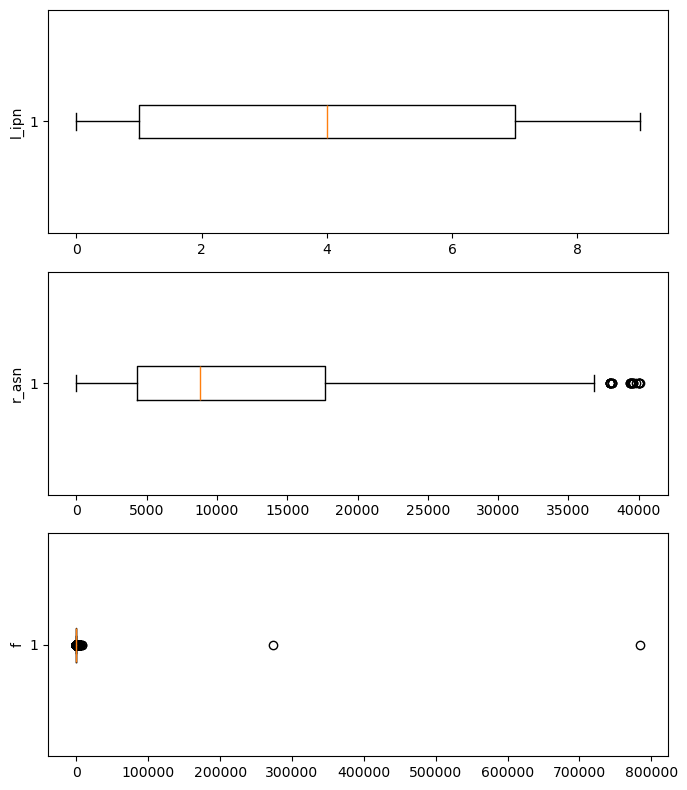

In [17]:
fig, axs = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(7, 8))
if len(df.columns) == 1:
    axs = [axs]
for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [19]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    return df_out
df = df.select_dtypes(include=[np.number])
df_cleaned = remove_outliers(df)
print(df_cleaned)

       l_ipn  r_asn  f
0          0    701  1
1          0    714  1
2          0   1239  1
3          0   1680  1
4          0   2514  1
...      ...    ... ..
20798      8  36351  3
20799      8  36856  4
20800      9   2152  1
20801      9   8070  1
20802      9   8075  2

[17447 rows x 3 columns]


D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


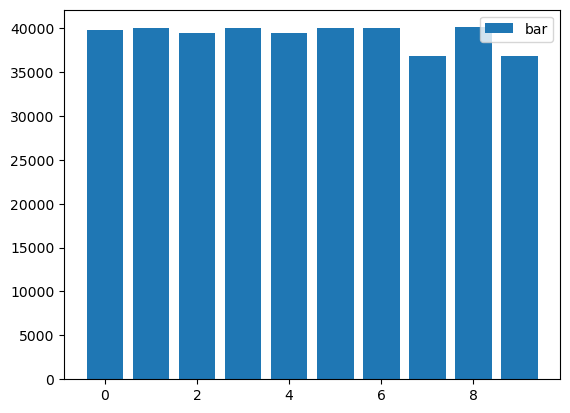

In [21]:
plt.bar(df['l_ipn'], df['r_asn'])
plt.legend(["bar"])
plt.show()

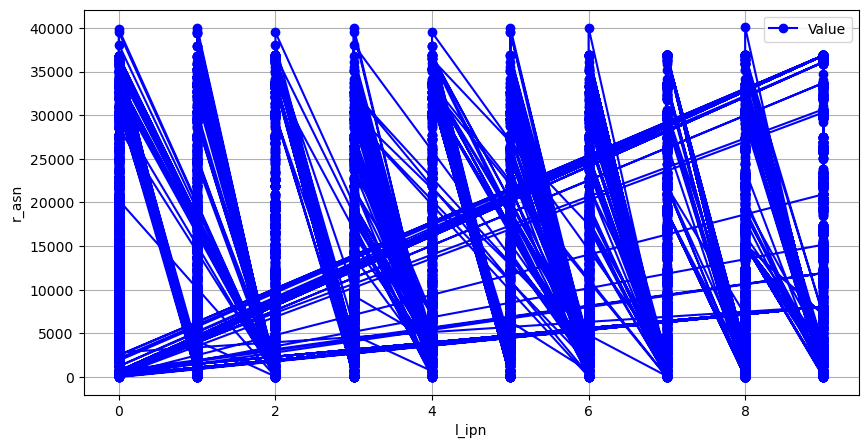

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(df['l_ipn'], df['r_asn'], marker='o', linestyle='-', color='b', label='Value')
plt.xlabel('l_ipn')
plt.ylabel('r_asn')
plt.legend()
plt.grid(True)
plt.show()

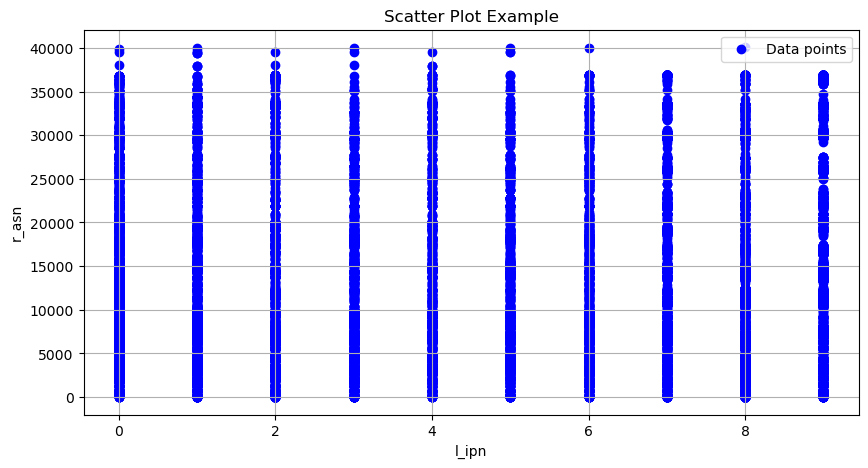

In [23]:
x_column = 'l_ipn'
y_column = 'r_asn'
plt.figure(figsize=(10, 5))
plt.scatter(df[x_column], df[y_column], color='b', label='Data points')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('Scatter Plot Example')
plt.legend()
plt.grid(True)
plt.show()

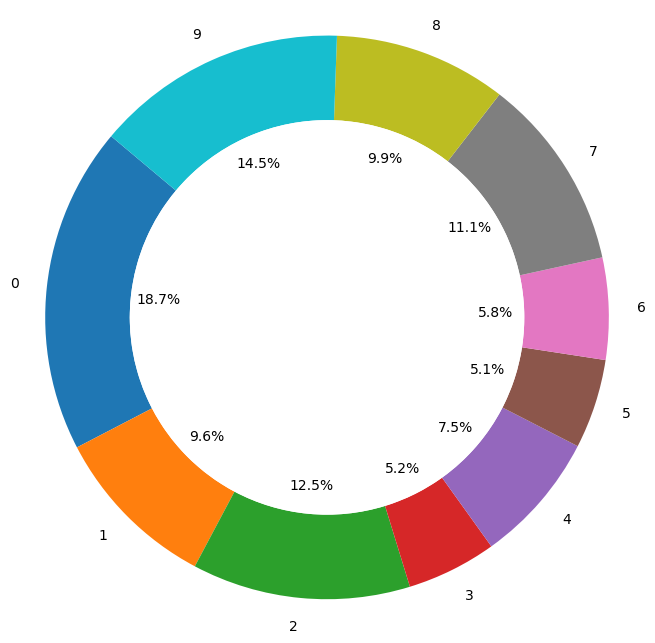

In [29]:
category_column = 'l_ipn'
value_column = 'r_asn'
category_data = df.groupby(category_column)[value_column].sum().reset_index()
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(category_data[value_column], 
                                  labels=category_data[category_column], 
                                  autopct='%1.1f%%', 
                                  startangle=140, 
                                  wedgeprops=dict(width=0.3))
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.axis('equal')  
plt.show()